# k-Means-Clustering mit den Iris (Flower) Datensatz

Importieren der erforderlichen Bibliotheken

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
import sklearn.metrics as sm

Datensatz einlesen und ausgeben

In [3]:
data = pd.read_csv('./iris.csv', header=None, delimiter=",") # Datensatz
data = pd.DataFrame(data)
data # Datensatz ausgeben

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Die Spalten bedeuten:
  - `0`: Sepal length in cm  
  - `1`: Sepal width in cm
  - `2`: Petal length in cm
  - `3`: Petal width in cm
  - `4`: Class (Iris Setosa | Iris Versicolour| Iris Virginica)

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmachinelearninghd.com%2Fwp-content%2Fuploads%2F2021%2F03%2Firis-dataset.png&f=1&nofb=1&ipt=529b08404b9d4926415c0e23c63f4516cf45ec335c9296d71409fd2ca5284b57&ipo=images" height=200px width="50%" alt="Schwertlillien">

## Datensatz bereinigen

Anzahl der Nullwerte im Datensatz ausgeben

In [4]:
data.isna().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

Datensat auf Duplikate überprüfen und diese ggf. entfernen

In [5]:
duplicate_data = data.copy() # Datensatz kopieren
duplicate_data.drop_duplicates(subset=None,inplace=True) # Duplikate entfernen
print("Datashape ohne Duplikate: ", duplicate_data.shape) 
print("Datashape Originaldaten: ", data.shape)

Datashape ohne Duplikate:  (147, 5)
Datashape Originaldaten:  (150, 5)


In [6]:
data = duplicate_data # Datensatz überschreiben

## Datenvorbereitug

Features und target festlegen

In [7]:
x = data[[0,1,2,3]] # Features
y = data[4] # Class/Target
x = pd.DataFrame.to_numpy(x) # df in array umwandeln

Anzahl der Klassenelemente zählen

In [8]:
y.value_counts()

4
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

Klassenbezeichnungen in Integern überführen:
  - Iris Setosa &rarr; 0
  - Iris Versicolour &rarr; 1
  - Iris Virginica &rarr; 2
<br>
und nochmals zählen zur Validierung

In [9]:
y.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}, inplace=True)
y.value_counts()

4
1    50
2    49
0    48
Name: count, dtype: int64

Daten mit dem MinMax-Scaler skalieren: 
$ X = (X - X.min()) / (X.max() - X.min()) $ <br>
Daten werden auf einen Wertebereich zwischen 0 und 1 skaliert

In [10]:
scaler = MinMaxScaler() # Scaler-Objekt erzeugen
scaled_data = scaler.fit_transform(x) # Objekt anwenden auf Daten
scaled_data = pd.DataFrame(scaled_data) # Array in df umwandeln

Pairplots erzeugen, um zu ermitteln welche Achsen zur Visalisierung des Clustrings am Besten dienen<br>
Ich habe mich für (3/1) entschieden

/home/dimi67ch/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


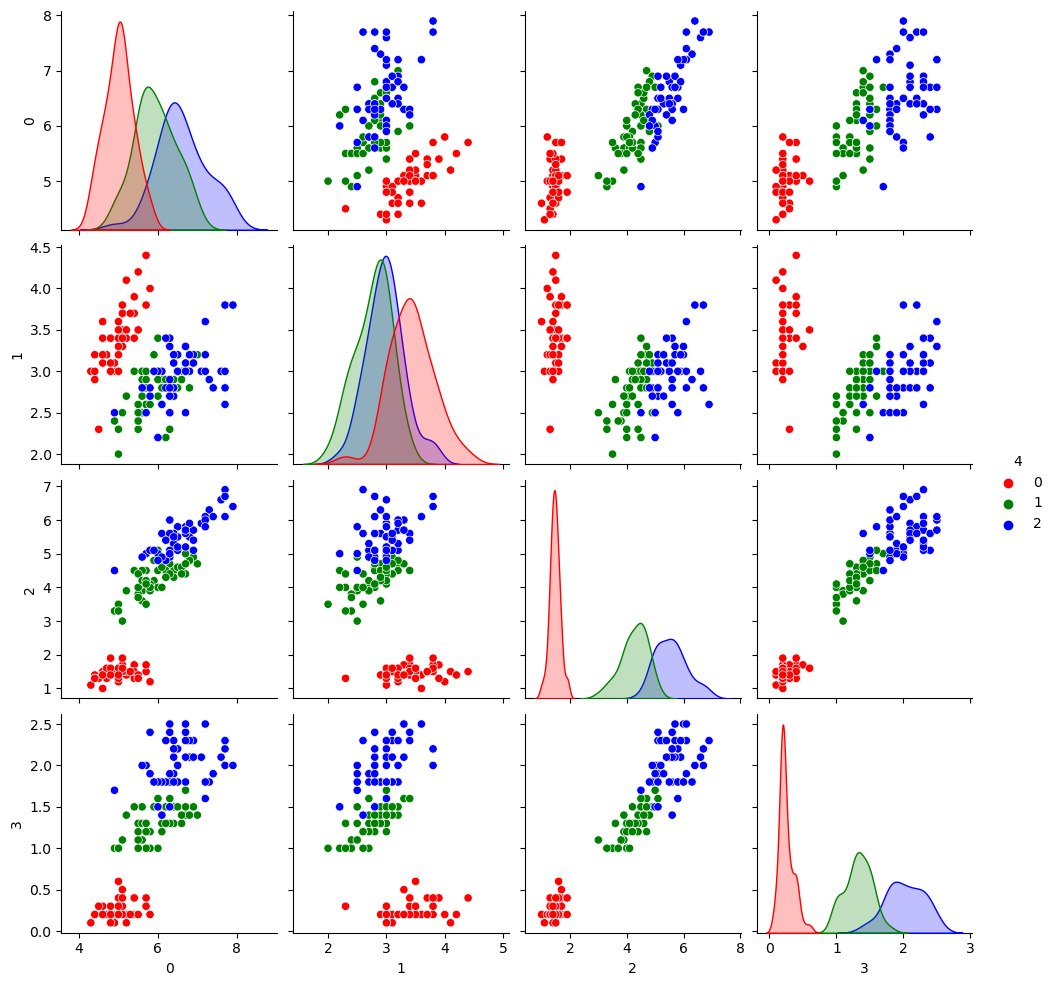

In [11]:
sns.pairplot(data, hue=4, palette=['r', 'g', 'b'])
plt.show()

## K-Means anwenden

### Ellenbogen-Methode
dient dazu **k**, also die Anzahl an Cluster. Ist aber in diesem Fall nicht wichtig, weil `k=3` schon gegeben war.

/home/dimi67ch/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dimi67ch/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dimi67ch/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dimi67ch/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

Text(0.5, 1.0, 'Elbow method')

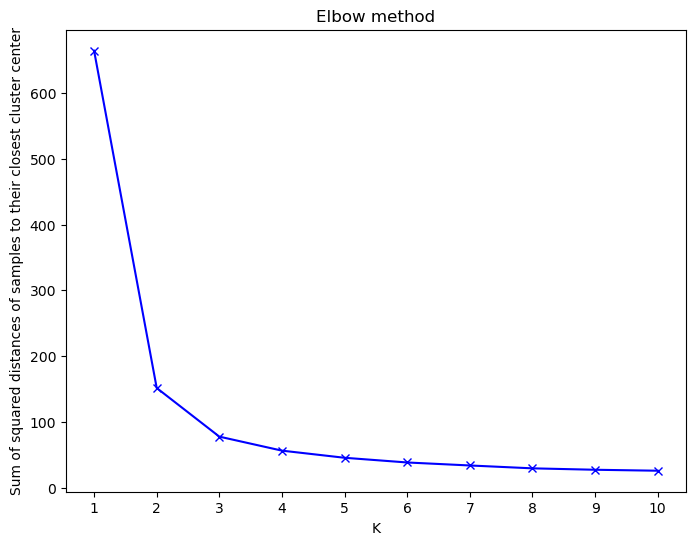

In [45]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, distortions, 'bx-')
plt.xticks(K)
plt.xlabel('K')
plt.ylabel('Sum of squared distances of samples to their closest cluster center')
plt.title('Elbow method')
plt.show

In [13]:
model = KMeans(n_clusters=3, random_state=0) # k-Means-objekt erzeugen
model.fit(scaled_data) # Algorithmus mit den daten antrainieren

/home/dimi67ch/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

Predictions ausgeben

In [14]:
prediction = model.labels_
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Predictions, bei denen 1 ausgegeben wurde, zu 0 umwandekn und Predictions, bei denen 0 ausgegeben wurd, zu 1 umwandeln, damit sie mit der "Integerbezeichnung" der Originalklassen übereinstimmen

In [15]:
prediction = np.where(prediction == 1, 0, np.where(prediction == 0, 1, prediction))
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

Predictions zu dem (skalierten) Datensatz hinzufügen und diesen ausgeben

In [16]:
scaled_data['predicted'] = prediction
scaled_data.head(5)

,0,1,2,3,predicted
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


## Plot predicted durch kMeans

Clusterzentren ausgeben

In [17]:
cluster_centres = model.cluster_centers_
cluster_centres

array([[0.44166667, 0.30763889, 0.57372881, 0.54583333],
       [0.19733796, 0.59635417, 0.07838983, 0.0625    ],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632]])

/home/dimi67ch/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


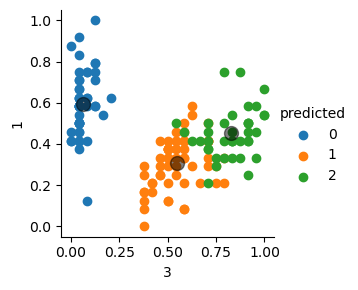

In [18]:
sns.FacetGrid(scaled_data, hue='predicted').map(plt.scatter, 3, 1).add_legend()
centers = cluster_centres
plt.scatter(centers[:,3], centers[:,1],c='black', s=100, alpha=0.5)

## Plot ohne kMeans

/home/dimi67ch/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


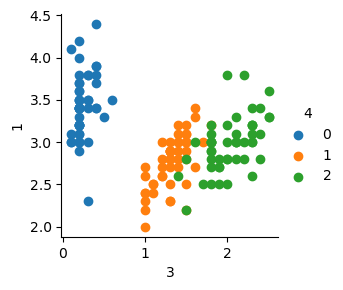

In [19]:
sns.FacetGrid(data, hue=4).map(plt.scatter, 3, 1).add_legend()

## Evaluation

### Kreuztabelle
zeigt die Häufigkeiten der Kombinationen von Werten an

In [20]:
pd.crosstab(y, prediction,rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2
Actual,,,
0,48,0,0
1,0,47,3
2,0,13,36


### Genauigkeit
$ Gesamtanzahl der Instanzen/Anzahl der korrekt klassifizierten Instanzen​ $

In [21]:
sm.accuracy_score(y, prediction)

0.891156462585034

### Präzision, recall und f1-score
- bezieht sich auf die Genauigkeit der positiven Vorhersagen im Vergleich zu allen positiven Vorhersagen
- Trefferquote (Recall): bezieht sich auf die Fähigkeit des Modells, alle tatsächlich positiven Instanzen zu erfassen
- harmonische Mittel aus Precision und Recall: $ {2×Precision×Recall}/{Precision+Recall} $

In [22]:
print(sm.classification_report(y, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.78      0.94      0.85        50
           2       0.92      0.73      0.82        49

    accuracy                           0.89       147
   macro avg       0.90      0.89      0.89       147
weighted avg       0.90      0.89      0.89       147



### Silhouette-Score:<br>
misst, wie gut die einzelnen Datenpunkte in einem Cluster im Vergleich zu anderen Clustern zusammengehalten werden. Der Silhouette Score liegt zwischen -1 und 1.
- `1`:  Datenpunkte sind gut innerhalb ihrer Cluster gruppiert und weit von anderen Clustern entfernt
- `0`:  Datenpunkte könnten sich überlappen oder in der Nähe der Grenze zwischen zwei Clustern liegen
- `-1`: Datenpunkte wurden wahrscheinlich falsch zugewiesen

In [23]:
sm.silhouette_score(data,prediction)

0.5475361027994519

<hr>

## Verusuche, das Modell zu verbessern

### 1. Duplikate mit einbeziehen

In [24]:
data_wDups = pd.read_csv('./iris.csv', header=None, delimiter=",") 
data_wDups = pd.DataFrame(data_wDups)
data_wDups

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [25]:
x_wDups = data_wDups[[0,1,2,3]] # Features
y_wDups = data_wDups[4] # Class/Target
x_wDups = pd.DataFrame.to_numpy(x_wDups) # df in array umwandeln

In [26]:
y_wDups.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}, inplace=True)
y_wDups.value_counts()

4
0    50
1    50
2    50
Name: count, dtype: int64

In [27]:
scaled_data = scaler.fit_transform(x_wDups) # Objekt anwenden auf Daten
scaled_data = pd.DataFrame(scaled_data) # Array in df umwandeln

In [28]:
model = KMeans(n_clusters=3, random_state=0) # k-Means-objekt erzeugen
model.fit(scaled_data) # Algorithmus mit den daten antrainieren
prediction = model.labels_
prediction = np.where(prediction == 1, 0, np.where(prediction == 0, 1, prediction))
prediction

/home/dimi67ch/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [29]:
pd.crosstab(y_wDups, prediction,rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2
Actual,,,
0,50,0,0
1,0,47,3
2,0,14,36


In [30]:
print(sm.classification_report(y_wDups, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.94      0.85        50
           2       0.92      0.72      0.81        50

    accuracy                           0.89       150
   macro avg       0.90      0.89      0.89       150
weighted avg       0.90      0.89      0.89       150



### 2. StandardScaler benutzen 

**Standardscaler** skaliert die Daten so, dass sie einen `Mittelwert von 0` und eine `Standardabweichung von 1` haben

In [31]:
standard_scaler = StandardScaler()
scaled_data = standard_scaler.fit_transform(x) # Objekt anwenden auf Daten
scaled_data = pd.DataFrame(scaled_data) # Array in df umwandeln
scaled_data.head(5)

,0,1,2,3
0,-0.915509,1.019971,-1.357737,-1.3357
1,-1.157560,-0.128082,-1.357737,-1.3357
2,-1.399610,0.331139,-1.414778,-1.3357
3,-1.520635,0.101529,-1.300696,-1.3357
4,-1.036535,1.249582,-1.357737,-1.3357


In [32]:
model = KMeans(n_clusters=3, random_state=0) # k-Means-objekt erzeugen
model.fit(scaled_data) # Algorithmus mit den daten antrainieren
prediction = model.labels_
prediction = np.where(prediction == 1, 0, np.where(prediction == 0, 1, prediction))
prediction

/home/dimi67ch/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [33]:
pd.crosstab(y, prediction,rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2
Actual,,,
0,48,0,0
1,0,39,11
2,0,13,36


In [34]:
print(sm.classification_report(y, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.75      0.78      0.76        50
           2       0.77      0.73      0.75        49

    accuracy                           0.84       147
   macro avg       0.84      0.84      0.84       147
weighted avg       0.84      0.84      0.84       147



### 3. kein Scaler

In [35]:
model = KMeans(n_clusters=3, random_state=0) # k-Means-objekt erzeugen
model.fit(data) # Algorithmus mit den daten antrainieren
prediction = model.labels_
prediction = np.where(prediction == 1, 0, np.where(prediction == 0, 1, prediction))
prediction

/home/dimi67ch/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [36]:
pd.crosstab(y, prediction,rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2
Actual,,,
0,48,0,0
1,0,50,0
2,0,1,48


In [37]:
print(sm.classification_report(y, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.98      1.00      0.99        50
           2       1.00      0.98      0.99        49

    accuracy                           0.99       147
   macro avg       0.99      0.99      0.99       147
weighted avg       0.99      0.99      0.99       147



### 4. kein Scaler + Duplikate

In [38]:
model = KMeans(n_clusters=3, random_state=0) # k-Means-objekt erzeugen
model.fit(data_wDups) # Algorithmus mit den daten antrainieren
prediction = model.labels_
prediction

/home/dimi67ch/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [39]:
pd.crosstab(y_wDups, prediction,rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2
Actual,,,
0,50,0,0
1,0,50,0
2,0,1,49


In [40]:
print(sm.classification_report(y_wDups, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      1.00      0.99        50
           2       1.00      0.98      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

